<b> <h2> <font color='darkblue'> AIRLINE CUSTOMER SATISFACTION PREDICTION USING ML ALGORITHMS </font> </h2> </b>

# Problem Statement 

To understand the experience of Passengers, Service Quality and their level of satisfaction with the flight services availed by them with reference to US Flights. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

# **Attribute Information:**

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral/dissatisfaction)

In [3]:
# Reading the dataset 
df_satisfaction = pd.read_csv('../input/airline-passenger-satisfaction/train.csv',index_col='Unnamed: 0')

# First 5 obersvation
df_satisfaction.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# First 5 observation
df_satisfaction.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Last 5 observation
df_satisfaction.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [6]:
# Checking for duplicates in the dataset
df_satisfaction[df_satisfaction.duplicated()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


- **No Duplicates in the dataset.**

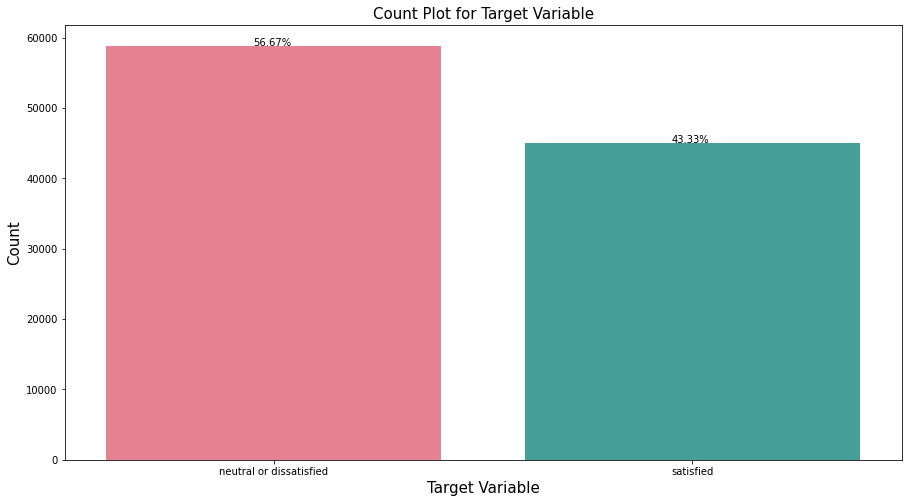

In [7]:
# target variable
df_target = df_satisfaction['satisfaction']
df_target.value_counts()
sns.countplot(x = df_target,palette='husl')
plt.text(x = 0.95, y = df_target.value_counts()[1] + 1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = -0.05, y = df_target.value_counts()[0] +1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

- **Above plot shows a distribution of around 56%:44% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment.**

# **EDA**

In [8]:
#Number of attribute and observation
print('Number of Observation:',df_satisfaction.shape[0])

print('Number of feature:',df_satisfaction.shape[1])

Number of Observation: 103904
Number of feature: 24


In [9]:
# Checking are datatype of the attribute
df_satisfaction.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

- **All the Datatype are corrected identified.**

In [10]:
# Describe Function 
df_satisfaction.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


- Five Point Summary are given here.

## **Missing Value Handling**

In [11]:
# Finding Missing Value in the Dataset
df_total = df_satisfaction.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df_satisfaction.isnull().sum()/df_satisfaction.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

,Total,Percentage
Arrival Delay in Minutes,310,0.298352
id,0,0.000000
Gender,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


-  **Arival Delay in Minutes has missing of 0.3% and all the other variable doesnt have missing value.**

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

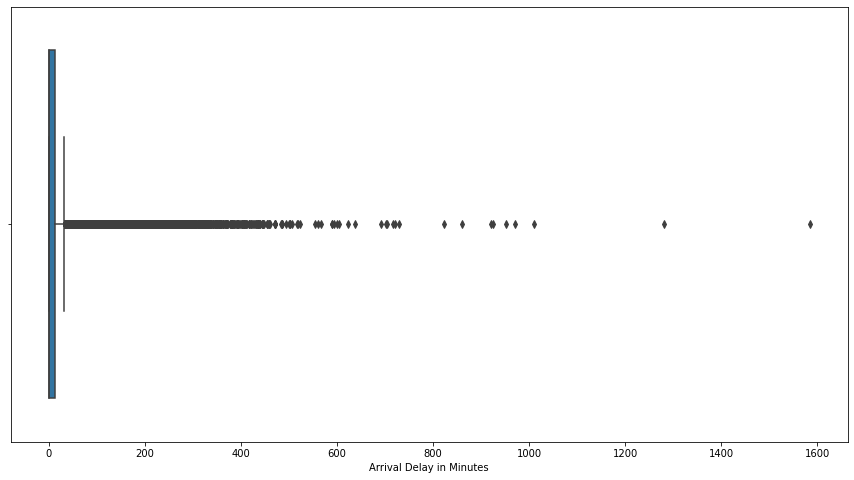

In [12]:
sns.boxplot(df_satisfaction['Arrival Delay in Minutes'])

In [13]:
#Checking for the median
df_satisfaction['Arrival Delay in Minutes'].median()

0.0

In [14]:
# Replace the missing the value with median as there are outliers
df_satisfaction['Arrival Delay in Minutes'].replace(np.NaN,0,inplace=True)

In [15]:
df_total = df_satisfaction.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df_satisfaction.isnull().sum()/df_satisfaction.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

,Total,Percentage
id,0,0.0
Gender,0,0.0
Arrival Delay in Minutes,0,0.0
Departure Delay in Minutes,0,0.0
Cleanliness,0,0.0
Inflight service,0,0.0
Checkin service,0,0.0
Baggage handling,0,0.0
Leg room service,0,0.0
On-board service,0,0.0


- **No Missing Value in the dataset**

In [16]:
#Making a copy of the Dataset
df_sat =df_satisfaction.copy()

## **Removing Insigificant Variable**

In [17]:
# Removing the id column as it irrelvant
df_sat.drop(['id'],axis=1,inplace=True)

In [18]:
# Standard Deivation 
df_sat.std()

Age                                   15.114964
Flight Distance                      997.147281
Inflight wifi service                  1.327829
Departure/Arrival time convenient      1.525075
Ease of Online booking                 1.398929
Gate location                          1.277621
Food and drink                         1.329533
Online boarding                        1.349509
Seat comfort                           1.319088
Inflight entertainment                 1.332991
On-board service                       1.288354
Leg room service                       1.315605
Baggage handling                       1.180903
Checkin service                        1.265396
Inflight service                       1.175663
Cleanliness                            1.312273
Departure Delay in Minutes            38.230901
Arrival Delay in Minutes              38.649776
dtype: float64

- **None of the Attribute has Standard Deviation 0 we cant remove them.**

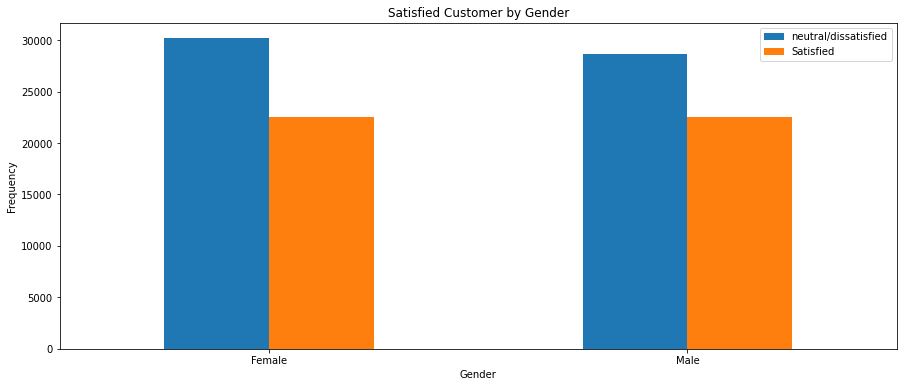

In [19]:
pd.crosstab(df_sat.Gender,df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Gender')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

- **Gender-wise distribution of dissatisfied and satisfied customers are quite same.In both the case male and female the dissatisfied customers are more than satisfied customer.**

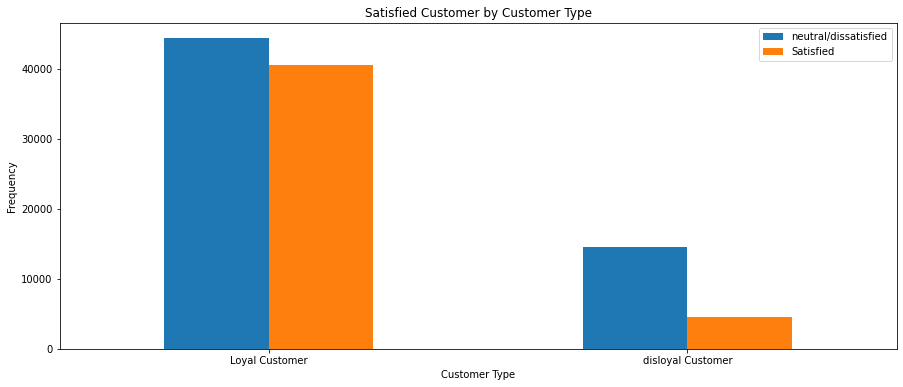

In [20]:
pd.crosstab(df_sat['Customer Type'],df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Customer Type')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

- **Loyal Customer are more in number even tho count of satisfied and dissatisfied customer is same in Loyal Customer.**

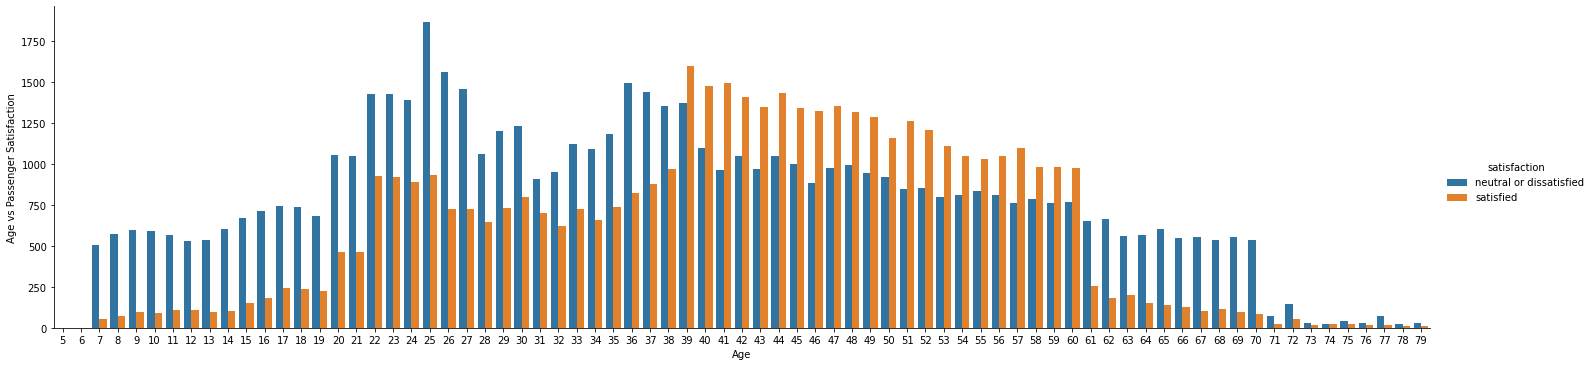

In [21]:
g = sns.catplot("Age", data=df_sat, aspect=4.0, kind='count', hue='satisfaction', order=range(5, 80))
g.set_ylabels('Age vs Passenger Satisfaction')

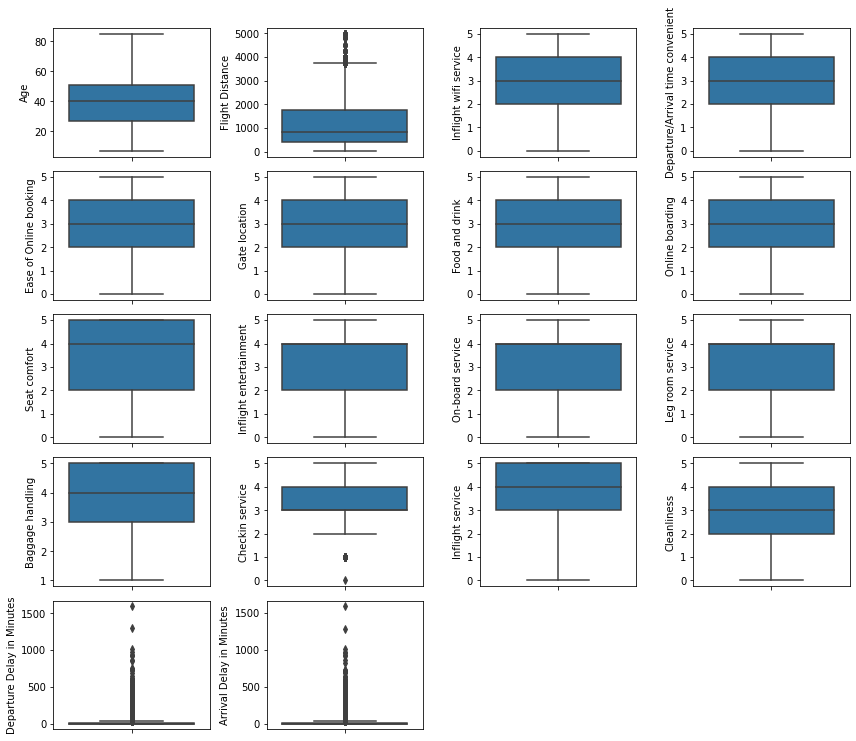

In [22]:
fig = plt.figure(figsize=(12,18))
df_num = df_sat.select_dtypes(include=np.number)
for i in range(len(df_num.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df_num.iloc[:,i])

plt.tight_layout()
plt.show()

- **Outlier are present in Departure Delay,Arrival Delay,Chechin Service and Flight Distance.**






# **Distribution of the numerical variable**

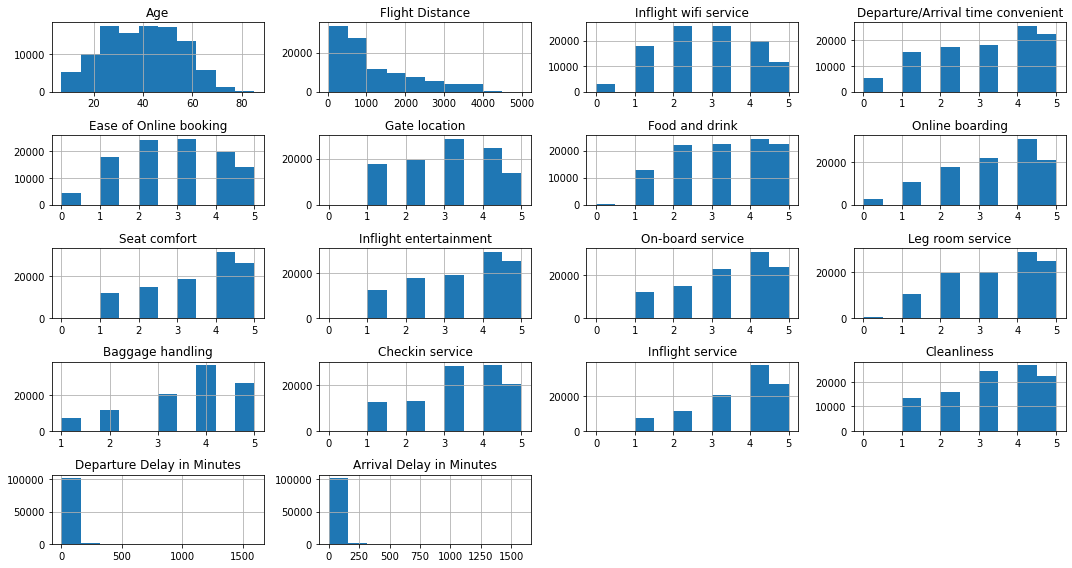

Skewness:


Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Arrival Delay in Minutes             6.605288
dtype: float64

In [23]:
df_sat.drop('satisfaction', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df_sat.drop('satisfaction', axis = 1).skew()

In [24]:
df_sat.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## **Encoding**




In [25]:
# Encoding the Categorically variable
df_cat = df_sat.loc[:,['Gender' ,'Customer Type','Type of Travel' ,'Class','satisfaction']]

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_cat.columns:
    lencoders[col] = LabelEncoder()
    df_cat[col] = lencoders[col].fit_transform(df_cat[col])
df_cat

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,1,0,1,2,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,1,0,0,0,1
...,...,...,...,...,...
103899,0,1,0,1,0
103900,1,0,0,0,1
103901,1,1,0,0,0
103902,0,1,0,1,0


In [26]:
df3 = df_sat.loc[:,['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
df3

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [27]:
df_cat1 = pd.concat([df_cat,df3],axis=1)
df_cat1

,Gender,Customer Type,Type of Travel,Class,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,0,1,2,0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,1,1,0,0,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,0,0,0,0,1,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,0,0,0,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,1,0,0,0,1,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,0,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,1,0,0,0,1,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,0,0,0,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,0,1,0,1,0,1,1,1,5,1,1,1,1,4,5,1,5,4,1


## **Scale the data**

In [28]:
from sklearn.preprocessing import StandardScaler 
Standard_scaler = StandardScaler()
df1 = df_sat.loc[:,['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
Standard_scaler.fit(df1)
df_final = pd.DataFrame(Standard_scaler.transform(df1), columns=df1.columns)

# First 5 observation
df_final.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.745279,-0.731539,0.266393,0.074169
1,-0.951360,-0.957184,-0.361375,-0.236313
2,-0.885200,-0.047584,-0.387532,-0.391554
3,-0.951360,-0.629246,-0.099805,-0.158692
4,1.430397,-0.978244,-0.387532,-0.391554


In [29]:
df_final_draft = pd.concat([df_cat1,df_final],axis=1)
df_final_draft

,Gender,Customer Type,Type of Travel,Class,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,2,0,3,4,3,1,5,...,4,3,4,4,5,5,-1.745279,-0.731539,0.266393,0.074169
1,1,1,0,0,0,3,2,3,3,1,...,1,5,3,1,4,1,-0.951360,-0.957184,-0.361375,-0.236313
2,0,0,0,0,1,2,2,2,2,5,...,4,3,4,4,4,5,-0.885200,-0.047584,-0.387532,-0.391554
3,0,0,0,0,0,2,5,5,5,2,...,2,5,3,1,4,2,-0.951360,-0.629246,-0.099805,-0.158692
4,1,0,0,0,1,3,3,3,3,4,...,3,4,4,3,3,3,1.430397,-0.978244,-0.387532,-0.391554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,0,2,1,2,3,2,...,3,1,4,2,3,2,-1.083680,-1.000307,-0.309061,-0.391554
103900,1,0,0,0,1,4,4,4,4,2,...,5,5,5,5,5,4,0.636478,1.160869,-0.387532,-0.391554
103901,1,1,0,0,0,1,1,1,3,4,...,3,2,4,5,5,4,-0.620561,0.807860,-0.204433,-0.029325
103902,0,1,0,1,0,1,1,1,5,1,...,4,5,1,5,4,1,-1.149840,-0.189991,-0.387532,-0.391554


## **Mutlicollinearity**

<AxesSubplot:>

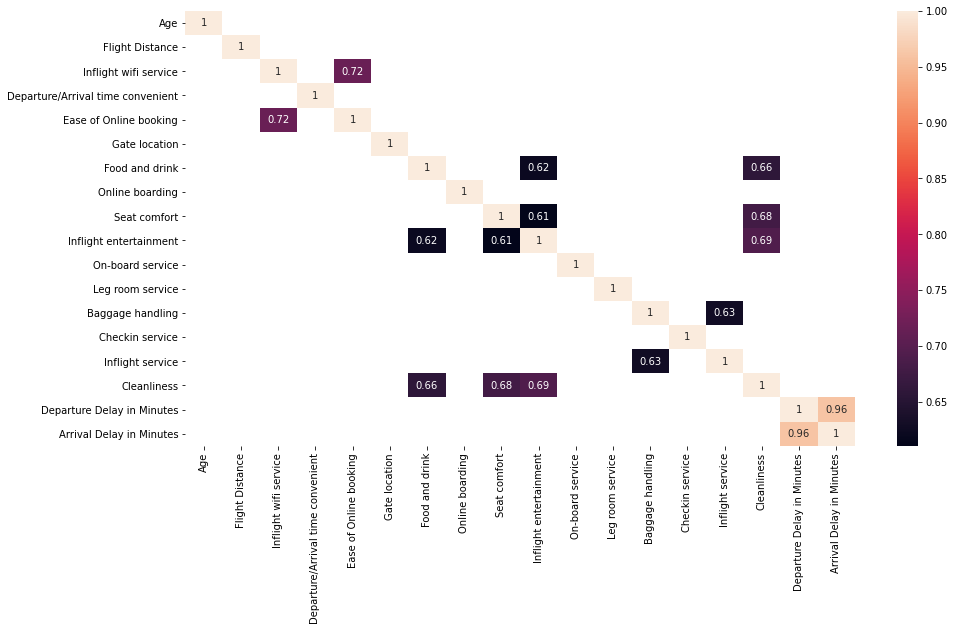

In [30]:
# mutlicollinearity
df = df_sat.drop('satisfaction',axis=1)
sns.heatmap(df.corr()[np.abs(df.corr()>0.6)],annot=True)

- **Their is Correlation between the variable.**

## **Train-Test Split**

In [31]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
y =df_final_draft['satisfaction']
df_num_scaled = df_final_draft.drop(['satisfaction'],axis=1)
X = sm.add_constant(df_num_scaled)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (72732, 23)
y_train (72732,)
X_test (31172, 23)
y_test (31172,)


## **Logistic Regression (Full Model)-Model 1**

In [32]:
log_reg_full = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_full.summary())

Optimization terminated successfully.
         Current function value: 0.336150
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                72732
Model:                          Logit   Df Residuals:                    72709
Method:                           MLE   Df Model:                           22
Date:                Mon, 03 May 2021   Pseudo R-squ.:                  0.5085
Time:                        11:49:17   Log-Likelihood:                -24449.
converged:                       True   LL-Null:                       -49741.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -6.2870      0.079    -79

In [33]:
y_pred_prob = log_reg_full.predict(X_test)
y_pred_prob.head()

2764      0.127047
94185     0.186865
84        0.958515
103238    0.057290
47413     0.434026
dtype: float64

In [34]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 0, 1, 0, 0]

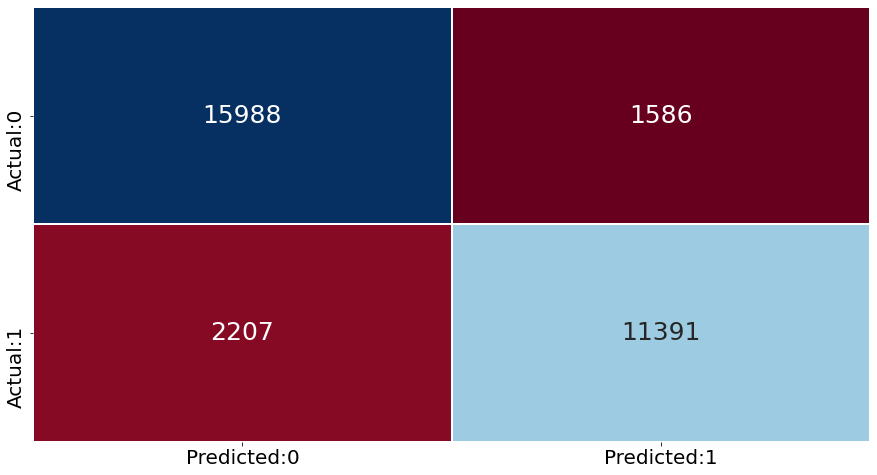

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [36]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

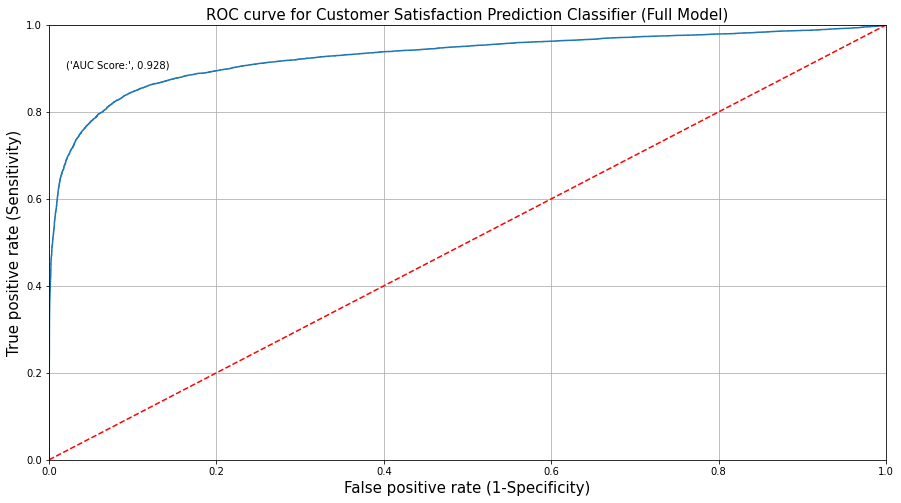

In [37]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [38]:
score_card = pd.DataFrame(columns=['Model_Name','Threshold','AUC Score','Accuracy Score','Precision Score', 'Recall Score', 'Specificity','Kappa Score','FPR','f1-score'])


In [39]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'SimpleLogisticRegression-(FullModel)','Threshold':0.5,'AUC Score':metrics.roc_auc_score(y_test, y_pred_prob),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.87832,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272


## **Optimal Threshold value**

In [40]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.837623,0.090133,0.500435,0.747490
1,0.837697,0.090247,0.500034,0.747450
2,0.842697,0.095254,0.485337,0.747443
3,0.842918,0.095482,0.484554,0.747436
4,0.837770,0.090361,0.499580,0.747410


 - As we can see that the optimal cut-off probability is approximately **0.5**.

## **Feature Selection Using Recursive Feature Elimination(RFE) Model-2**

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# consider the independent variables (without the intercept term)
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 12)
rfe_model = rfe_model.fit(X_train_rfe, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Arrival Delay in Minutes'],
      dtype='object')


In [42]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df_num1 = df_final_draft.loc[:,['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes']]
X = sm.add_constant(df_num1)
y =df_final_draft['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (72732, 13)
y_train (72732,)
X_test (31172, 13)
y_test (31172,)


In [43]:
log_reg_feature = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_feature.summary())

Optimization terminated successfully.
         Current function value: 0.339548
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                72732
Model:                          Logit   Df Residuals:                    72719
Method:                           MLE   Df Model:                           12
Date:                Mon, 03 May 2021   Pseudo R-squ.:                  0.5035
Time:                        11:49:34   Log-Likelihood:                -24696.
converged:                       True   LL-Null:                       -49741.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.2281      0.070    -89.389      0.000      -6.365

In [44]:
y_pred_prob = log_reg_feature.predict(X_test)
y_pred_prob.head()

2764      0.098610
94185     0.170124
84        0.954941
103238    0.031204
47413     0.445664
dtype: float64

In [45]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 0, 1, 0, 0]

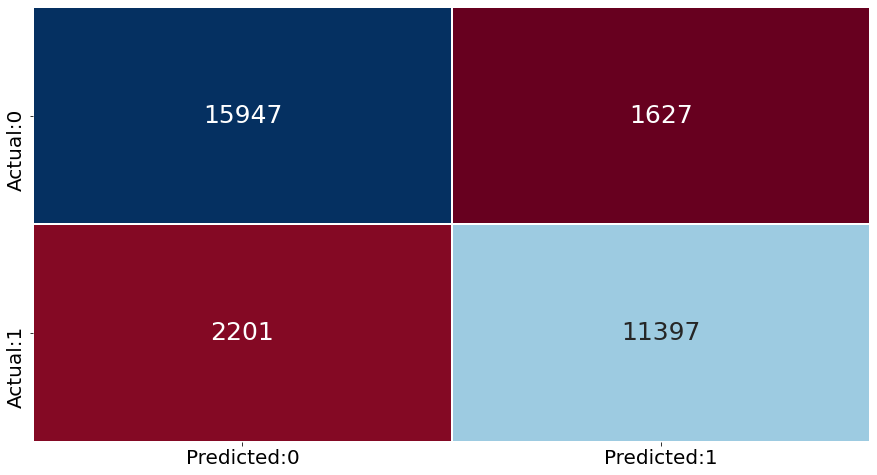

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

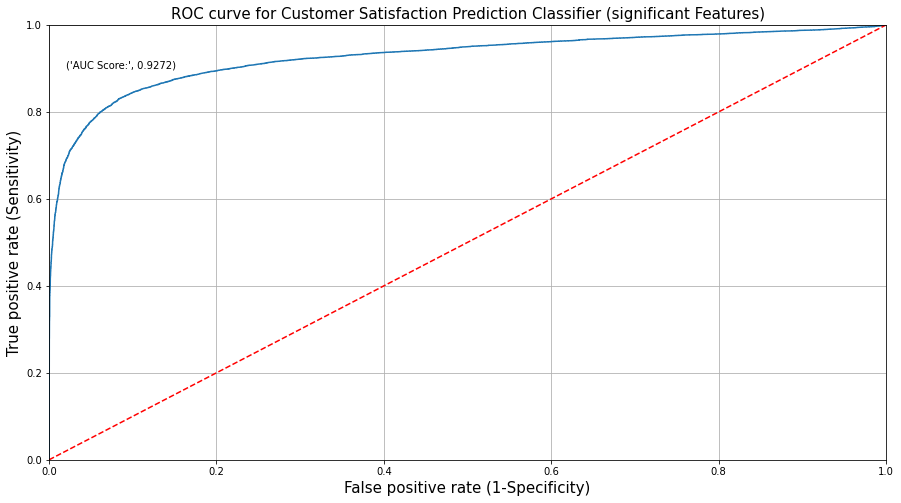

In [47]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (significant Features)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [48]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [49]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'SimpleLogisticRegressionSelectedFeature','Threshold':0.5,'AUC Score':metrics.roc_auc_score(y_test, y_pred_prob),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209


## Naive-bayes-Model 4

In [50]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = df_final_draft.loc[:,['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

y =df_final_draft['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (72732, 12)
y_train (72732,)
X_test (31172, 12)
y_test (31172,)


In [51]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [52]:
y_pred = gnb_model.predict(X_test)

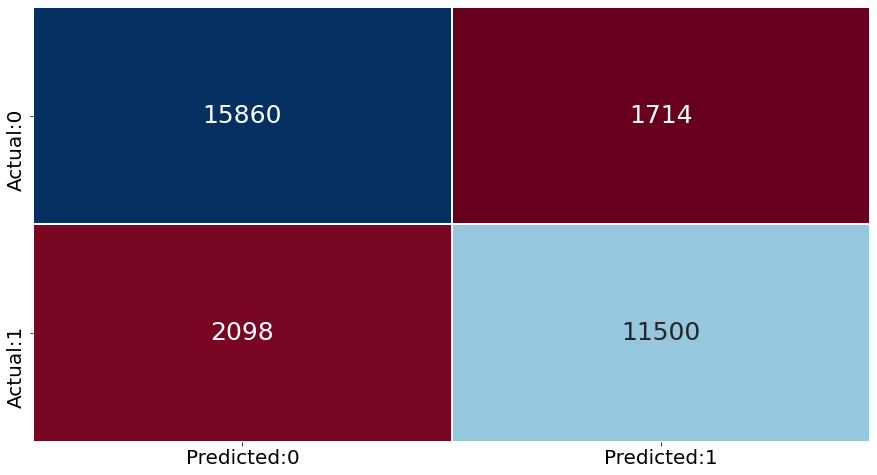

In [53]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

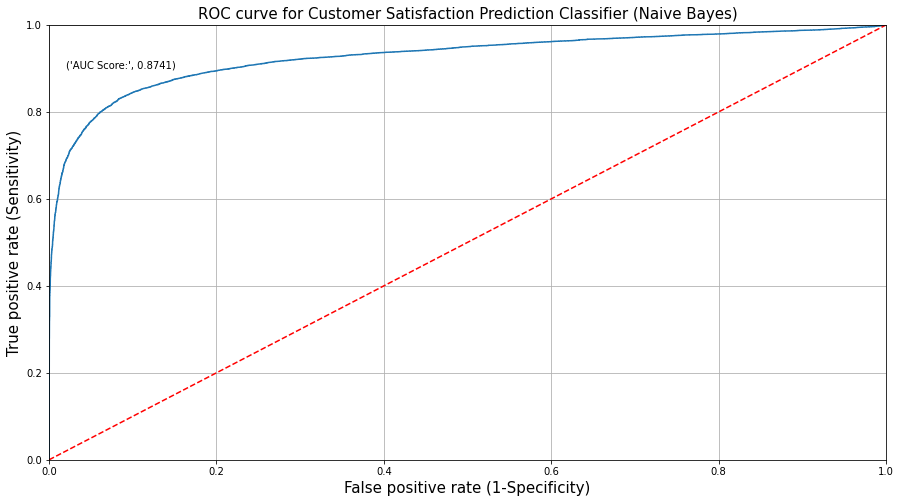

In [54]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Naive Bayes)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [55]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [56]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Navie-Bayes','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825


## **KNN(k=3)-Model 5**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors =3)
knn_model = knn_classification.fit(X_train, y_train)

In [58]:
y_pred = knn_model.predict(X_test)

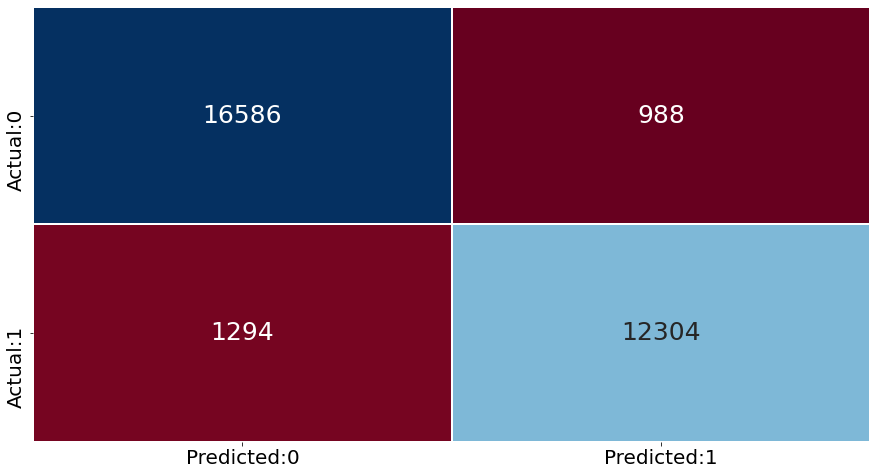

In [59]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

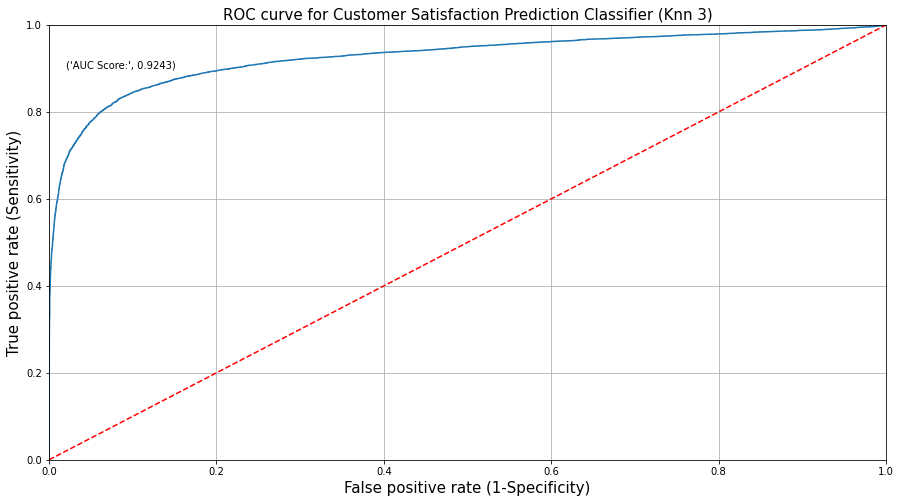

In [60]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Knn 3)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [61]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [62]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=3)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136


## **GridSearchCV-Model 5**

In [63]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean','hamming','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'hamming', 'n_neighbors': 21} 



In [64]:
knn_classification = KNeighborsClassifier(n_neighbors =17,metric='hamming')
knn_model = knn_classification.fit(X_train, y_train)

In [65]:
y_pred = knn_model.predict(X_test)

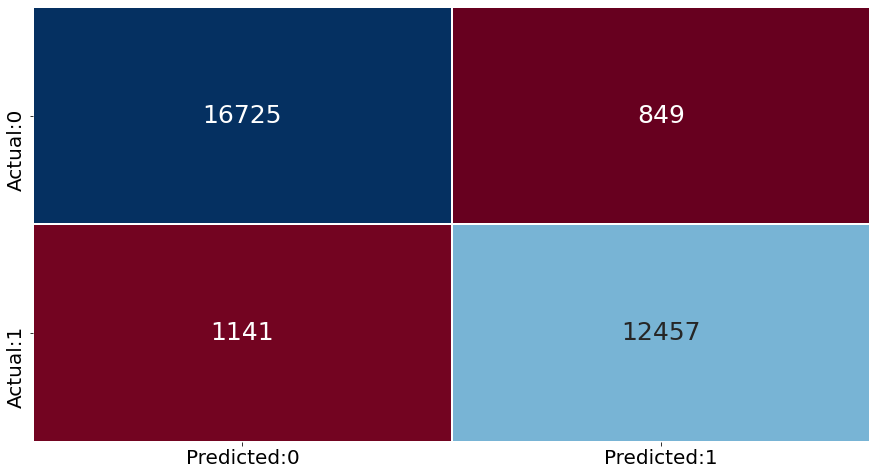

In [66]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

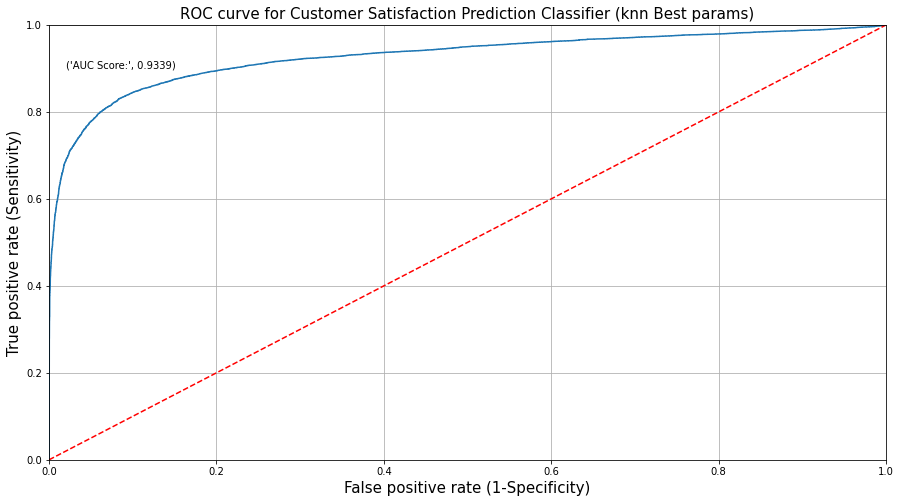

In [67]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (knn Best params)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [68]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [69]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=17)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136
4,KNN(N=17),-,0.933890,0.936161,0.936194,0.916091,0.951690,0.869894,0.048310,0.926033


## **DecisionTree-Model 6**


In [70]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [71]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [73]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

decision_tree = decision_tree_classification.fit(X_train, y_train)

In [74]:
import pydotplus
from IPython.display import Image  
labels = X_train.columns
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [75]:
y_pred = decision_tree.predict(X_test)

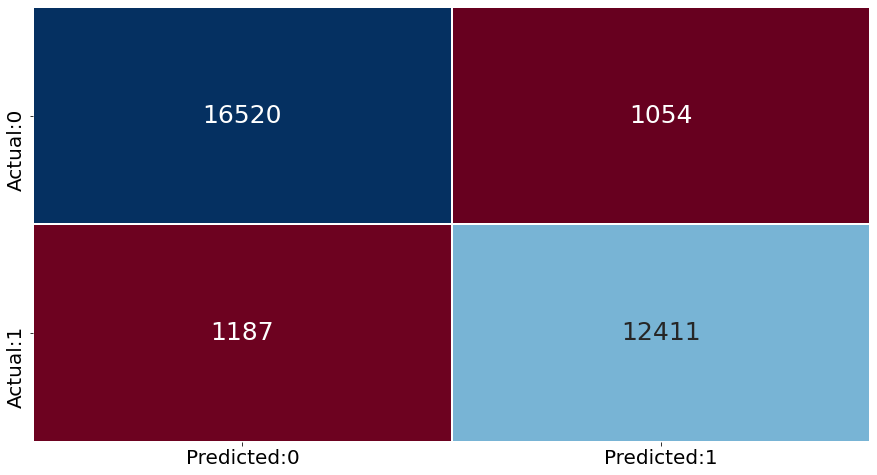

In [76]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [77]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [78]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Decision-Tree','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136
4,KNN(N=17),-,0.933890,0.936161,0.936194,0.916091,0.951690,0.869894,0.048310,0.926033
5,Decision-Tree,-,0.926366,0.928109,0.921723,0.912708,0.940025,0.853677,0.059975,0.917193


In [79]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     41305
           1       1.00      0.98      0.99     31427

    accuracy                           0.99     72732
   macro avg       0.99      0.99      0.99     72732
weighted avg       0.99      0.99      0.99     72732



In [80]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     17574
           1       0.92      0.91      0.92     13598

    accuracy                           0.93     31172
   macro avg       0.93      0.93      0.93     31172
weighted avg       0.93      0.93      0.93     31172



**There is slight significant difference between the train and test accuracy; thus can conclude that the decision tree is less over-fitted.**

# **Grid Search decision tree - Model 7**

In [81]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [82]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(2,10),
                     'max_leaf_nodes' : range(2,10)
                     }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 2} 



In [83]:
dt_model = DecisionTreeClassifier(criterion ='gini',
                                  max_depth = 5,
                                  max_leaf_nodes = 9,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

[Text(354.11538461538464, 398.64, 'X[5] <= 3.5\ngini = 0.491\nsamples = 72732\nvalue = [41305, 31427]'),
 Text(128.76923076923077, 326.15999999999997, 'X[3] <= 0.5\ngini = 0.253\nsamples = 36736\nvalue = [31276, 5460]'),
 Text(64.38461538461539, 253.67999999999998, 'gini = 0.01\nsamples = 1243\nvalue = [6, 1237]'),
 Text(193.15384615384616, 253.67999999999998, 'X[3] <= 3.5\ngini = 0.21\nsamples = 35493\nvalue = [31270, 4223]'),
 Text(128.76923076923077, 181.2, 'gini = 0.124\nsamples = 32221\nvalue = [30083, 2138]'),
 Text(257.53846153846155, 181.2, 'gini = 0.462\nsamples = 3272\nvalue = [1187, 2085]'),
 Text(579.4615384615385, 326.15999999999997, 'X[1] <= 0.5\ngini = 0.402\nsamples = 35996\nvalue = [10029, 25967]'),
 Text(450.69230769230774, 253.67999999999998, 'X[6] <= 3.5\ngini = 0.255\nsamples = 28636\nvalue = [4287, 24349]'),
 Text(386.3076923076923, 181.2, 'X[5] <= 4.5\ngini = 0.435\nsamples = 9869\nvalue = [3154, 6715]'),
 Text(321.9230769230769, 108.71999999999997, 'X[9] <= 2.5\

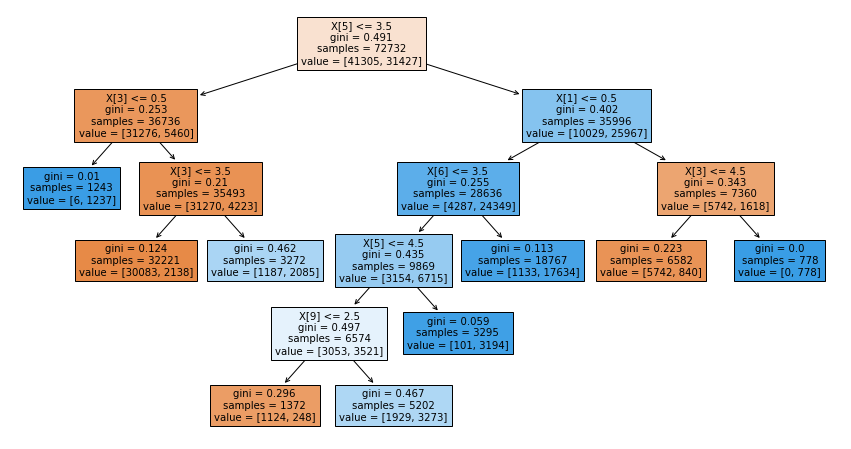

In [84]:
tree.plot_tree(dt_model,filled=True)

In [85]:
train_report = get_train_report(dt_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     41305
           1       0.87      0.90      0.88     31427

    accuracy                           0.90     72732
   macro avg       0.89      0.90      0.89     72732
weighted avg       0.90      0.90      0.90     72732



In [86]:
test_report = get_test_report(dt_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     17574
           1       0.87      0.90      0.89     13598

    accuracy                           0.90     31172
   macro avg       0.90      0.90      0.90     31172
weighted avg       0.90      0.90      0.90     31172



In [87]:
y_pred = dt_model.predict(X_test)

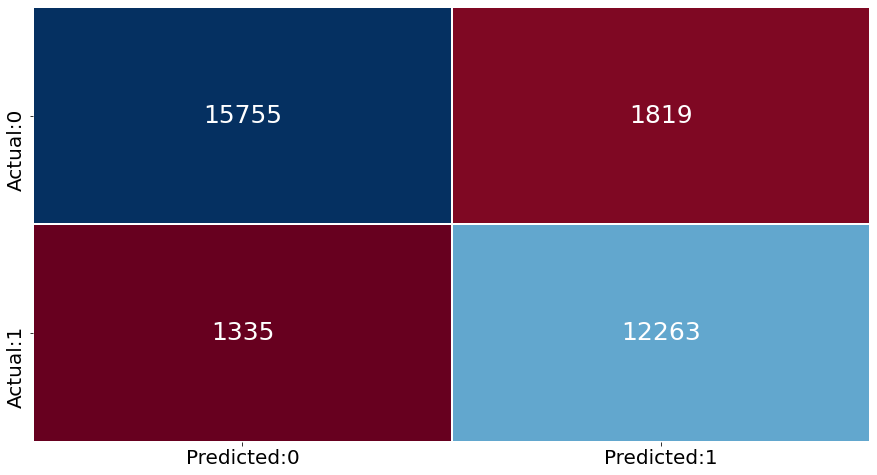

In [88]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [89]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [90]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Decision-Tree With Best Params','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136
4,KNN(N=17),-,0.933890,0.936161,0.936194,0.916091,0.951690,0.869894,0.048310,0.926033
5,Decision-Tree,-,0.926366,0.928109,0.921723,0.912708,0.940025,0.853677,0.059975,0.917193
6,Decision-Tree With Best Params,-,0.899159,0.898819,0.870828,0.901824,0.896495,0.795117,0.103505,0.886055


- **We see test and train data have equal accuracy.**


# **RandomForest - Model 8**

In [91]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [92]:
train_report = get_train_report(rf_classification)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     41305
           1       0.99      0.98      0.98     31427

    accuracy                           0.99     72732
   macro avg       0.99      0.99      0.99     72732
weighted avg       0.99      0.99      0.99     72732



In [93]:
test_report = get_test_report(rf_classification)
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17574
           1       0.95      0.92      0.93     13598

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



In [94]:
y_pred = rf_classification.predict(X_test)

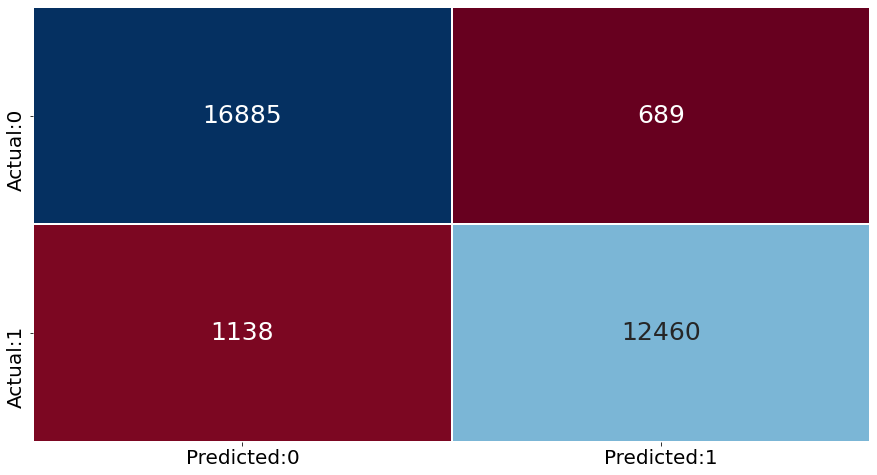

In [95]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [96]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'RandomForest','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136
4,KNN(N=17),-,0.933890,0.936161,0.936194,0.916091,0.951690,0.869894,0.048310,0.926033
5,Decision-Tree,-,0.926366,0.928109,0.921723,0.912708,0.940025,0.853677,0.059975,0.917193
6,Decision-Tree With Best Params,-,0.899159,0.898819,0.870828,0.901824,0.896495,0.795117,0.103505,0.886055
7,RandomForest,-,0.938553,0.898819,0.870828,0.901824,0.896495,0.880394,0.103505,0.886055


# **Grid Search RandomSearch - Model 9**

In [97]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11],
                     }]
 
random_forest_classification = RandomForestClassifier(random_state = 10)


rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 11, 'n_estimators': 70} 



In [98]:
rf_model = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 70,
                                  max_depth = 20,
                                  min_samples_split = 8,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)



In [99]:
print( get_train_report(rf_model))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     41305
           1       0.98      0.95      0.96     31427

    accuracy                           0.97     72732
   macro avg       0.97      0.97      0.97     72732
weighted avg       0.97      0.97      0.97     72732



In [100]:
print(get_test_report(rf_model))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     17574
           1       0.95      0.93      0.94     13598

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172



In [101]:
y_pred = rf_model.predict(X_test)

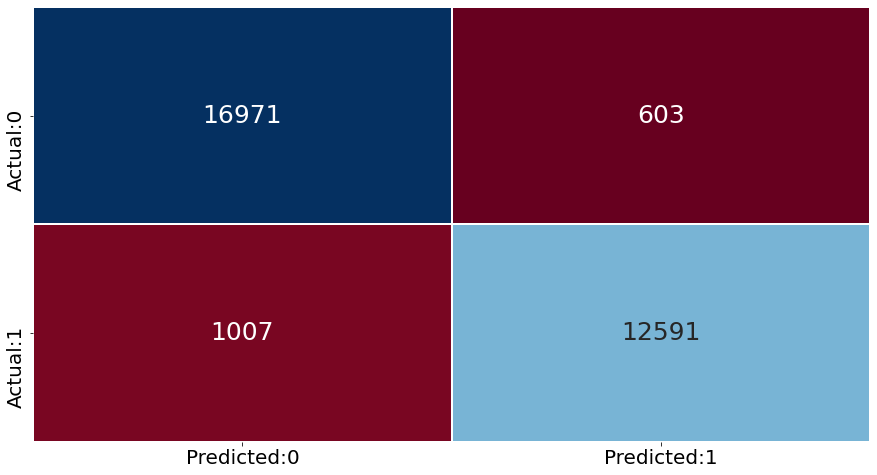

In [102]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [103]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [104]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'RandomForest With Best Params','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136
4,KNN(N=17),-,0.933890,0.936161,0.936194,0.916091,0.951690,0.869894,0.048310,0.926033
5,Decision-Tree,-,0.926366,0.928109,0.921723,0.912708,0.940025,0.853677,0.059975,0.917193
6,Decision-Tree With Best Params,-,0.899159,0.898819,0.870828,0.901824,0.896495,0.795117,0.103505,0.886055
7,RandomForest,-,0.938553,0.898819,0.870828,0.901824,0.896495,0.880394,0.103505,0.886055
8,RandomForest With Best Params,-,0.945816,0.948351,0.954297,0.925945,0.965688,0.894640,0.034312,0.939907


# **AdaBoost Model - Model 10**

In [105]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [106]:
y_pred = ada_model.predict(X_test)

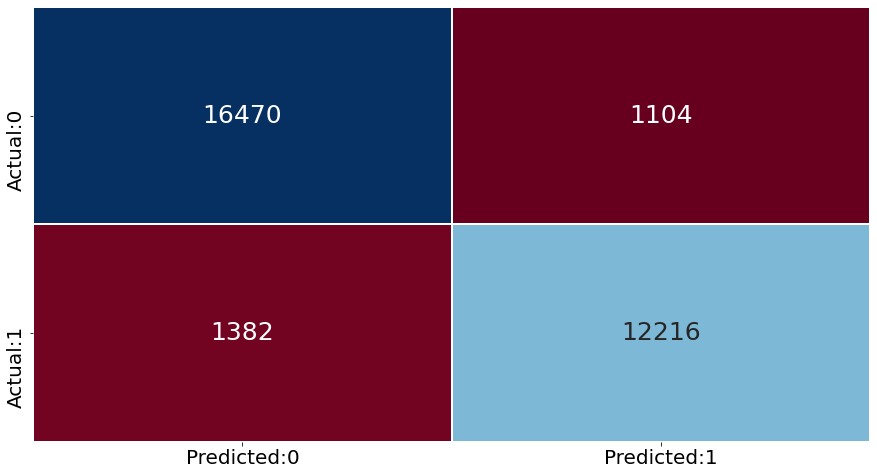

In [107]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [108]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [109]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'AdaBoost','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136
4,KNN(N=17),-,0.933890,0.936161,0.936194,0.916091,0.951690,0.869894,0.048310,0.926033
5,Decision-Tree,-,0.926366,0.928109,0.921723,0.912708,0.940025,0.853677,0.059975,0.917193
6,Decision-Tree With Best Params,-,0.899159,0.898819,0.870828,0.901824,0.896495,0.795117,0.103505,0.886055
7,RandomForest,-,0.938553,0.898819,0.870828,0.901824,0.896495,0.880394,0.103505,0.886055
8,RandomForest With Best Params,-,0.945816,0.948351,0.954297,0.925945,0.965688,0.894640,0.034312,0.939907
9,AdaBoost,-,0.917774,0.920249,0.917117,0.898367,0.937180,0.837484,0.062820,0.907645


# **XGBoost Model with tuned Params - Model 11**

In [110]:
from xgboost import XGBClassifier
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[13:29:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:29:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [111]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))


xgb_model = xgb_grid_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(xgb_model))

[13:47:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for test set:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     17574
           1       0.96      0.93      0.94     13598

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172



In [112]:
y_pred = xgb_grid_model.predict(X_test)

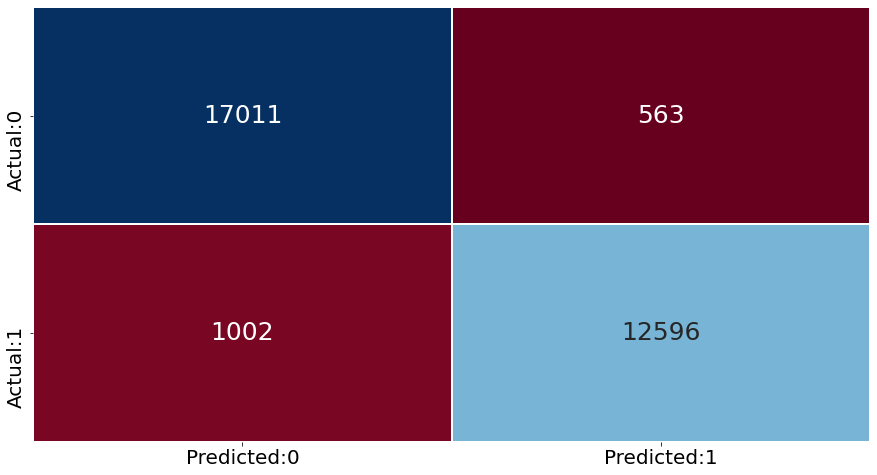

In [113]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [114]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [115]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'XGBoost-TunedParams','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Threshold,AUC Score,Accuracy Score,Precision Score,Recall Score,Specificity,Kappa Score,FPR,f1-score
0,SimpleLogisticRegression-(FullModel),0.5,0.928015,0.878320,0.877784,0.837697,0.909753,0.751331,0.090247,0.857272
1,SimpleLogisticRegressionSelectedFeature,0.5,0.927185,0.877197,0.875077,0.838138,0.907420,0.749135,0.092580,0.856209
2,Navie-Bayes,-,0.874091,0.877711,0.870289,0.845713,0.902470,0.750580,0.097530,0.857825
3,KNN(N=3),-,0.924310,0.926793,0.925670,0.904839,0.943781,0.850785,0.056219,0.915136
4,KNN(N=17),-,0.933890,0.936161,0.936194,0.916091,0.951690,0.869894,0.048310,0.926033
5,Decision-Tree,-,0.926366,0.928109,0.921723,0.912708,0.940025,0.853677,0.059975,0.917193
6,Decision-Tree With Best Params,-,0.899159,0.898819,0.870828,0.901824,0.896495,0.795117,0.103505,0.886055
7,RandomForest,-,0.938553,0.898819,0.870828,0.901824,0.896495,0.880394,0.103505,0.886055
8,RandomForest With Best Params,-,0.945816,0.948351,0.954297,0.925945,0.965688,0.894640,0.034312,0.939907
9,AdaBoost,-,0.917774,0.920249,0.917117,0.898367,0.937180,0.837484,0.062820,0.907645
